# Optimising Character Classification Network

## Import

In [1]:
from lab3.nn_general import NeuralNetwork, batchTrain, test
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})
import pandas as pd

## Train with different activation functions

Get training data with 5000 lines

In [5]:
file = open("datasources\mnist_train_5000.csv", 'r')
data_training = file.readlines()
file.close()

Get validation data of 500 lines from other end of full dataset

In [6]:
file = open("datasources\mnist_validation_500.csv", 'r')
data_validation = file.readlines()
file.close()

Get test data of 100 lines from completely independent dataset

In [7]:
file = open("datasources\mnist_test_100.csv", 'r')
data_testing = file.readlines()
file.close()

Load 3 best performers from excel

In [8]:
selected = pd.read_csv('.\datasources\selected_5k.csv', index_col=0)
selected = selected.sort_values(by='performance5k',ascending=False, ignore_index=True).head(3)
selected

,learningRates,performance,hiddenNodes,performanceUpdated,trainingCurve,validationCurve,performance5k
0,0.3,90,700,97,"97.36,98.34,99.32,99.44,99.38","94.41117764471058,95.20958083832335,96.0079840...",96.606786
1,0.3,90,200,96,"96.82,98.61999999999999,99.1,99.48,99.52","93.812375249501,96.00798403193613,96.207584830...",96.606786
2,0.3,90,1100,96,"96.56,98.54,99.32,99.46000000000001,99.5","93.6127744510978,95.60878243512974,96.40718562...",96.606786


In [9]:
epochs=3
batchSize=200

0it [00:00, ?it/s]C:\Users\Tobias Fechner\Documents\1 - Uni\yr-5\ee40098-computational-intelligence\git_repo\lab3\nn_general.py:60: RuntimeWarning: overflow encountered in multiply
  self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),
C:\Users\Tobias Fechner\Documents\1 - Uni\yr-5\ee40098-computational-intelligence\git_repo\lab3\nn_general.py:64: RuntimeWarning: invalid value encountered in multiply
  self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),


epoch number:  0
epoch number:  1
epoch number:  2


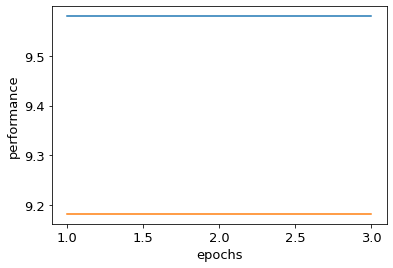

epoch number:  0


C:\Users\Tobias Fechner\Documents\1 - Uni\yr-5\ee40098-computational-intelligence\git_repo\lab3\nn_general.py:100: RuntimeWarning: overflow encountered in exp
  return lambda x: (2/(1 + np.exp(-2*x))) -1


epoch number:  1
epoch number:  2


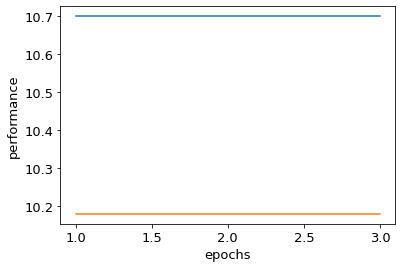

epoch number:  0
epoch number:  1
epoch number:  2


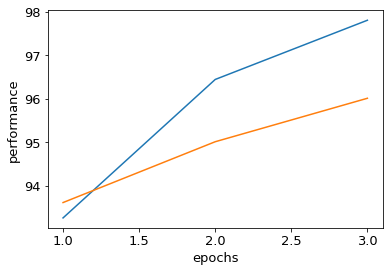

1it [04:22, 262.64s/it]

epoch number:  0
epoch number:  1
epoch number:  2


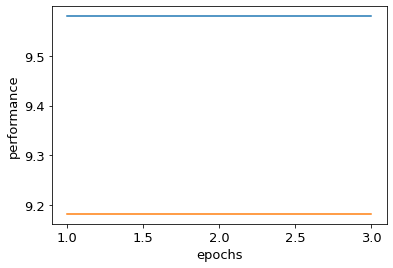

epoch number:  0


1it [04:54, 294.83s/it]


KeyboardInterrupt: 

In [10]:
for index, row in tqdm(selected.iterrows()):
    
    for activation_function in ['relu', 'tanh', 'sigmoid']:

        # Create new nn
        nn = NeuralNetwork(input_nodes=784, 
                           hidden_nodes=int(row['hiddenNodes']), 
                           output_nodes=10, 
                           lr=float(row['learningRates']),
                           activation_function=activation_function)

        nn, trainingCurve, validationCurve = batchTrain(data_training=data_training, 
                                                        data_validation=data_validation, 
                                                        nn=nn, 
                                                        batchSize=batchSize, 
                                                        epochs=epochs)

        plt.plot(range(1, epochs+1), trainingCurve, label='trainingCurve')
        plt.plot(range(1, epochs+1), validationCurve, label='validationCurve')
        plt.ylabel('performance')
        plt.xlabel('epochs')
        plt.show()

        selected.at[index, 'trainingCurve'] = ",".join([str(x) for x in trainingCurve])
        selected.at[index, 'validationCurve'] = ",".join([str(x) for x in validationCurve])

In [ ]:
selected['performance5k'] = selected['validationCurve'].apply(lambda x: max(x.split(',')))

In [ ]:
selected

## Save NN

In [ ]:
if nn:
    
else:
    print("No network to save.")